# Titanic Dataset - Data Exploration

## Notebook Overview
This notebook performs initial exploration of the Titanic dataset to understand:
- Dataset structure and dimensions
- Data types and missing values
- Basic statistical summaries
- Initial patterns and insights

**Author**: Your Name  
**Date**: September 2025  
**Duration**: ~1-2 hours

## 📚 Step 1: Load Our Tools

First, we need to load the Python libraries (tools) that will help us analyze the Titanic data. Think of these as importing different toolboxes for different jobs.

In [ ]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Statistical analysis
from scipy import stats

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set style for matplotlib
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

✅ Libraries imported successfully!


## Data Loading

### Dataset Information
- **Source**: Kaggle Titanic Competition
- **Description**: Passenger information from the RMS Titanic
- **Goal**: Analyze survival patterns and factors

### Load the Dataset

In [5]:
# Load the Titanic dataset
# Dataset from: https://www.kaggle.com/c/titanic/data
print("Loading Titanic Dataset from Kaggle Competition")

try:
    # Load the main training dataset (train.csv)
    df = pd.read_csv('../data/raw/train.csv')
    print("Training dataset (train.csv) loaded successfully!")
    print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")
    
    # Also load test and submission files for reference
    try:
        test_df = pd.read_csv('../data/raw/test.csv')
        submission_df = pd.read_csv('../data/raw/gender_submission.csv')
        print(f"Test dataset (test.csv): {test_df.shape[0]} rows × {test_df.shape[1]} columns")
        print(f"Sample submission (gender_submission.csv): {submission_df.shape[0]} rows × {submission_df.shape[1]} columns")
        print("\nDataset Summary:")
        print(f"• Training data: {df.shape[0]} passengers with survival outcomes")
        print(f"• Test data: {test_df.shape[0]} passengers without survival outcomes")
        print(f"• Total passengers: {df.shape[0] + test_df.shape[0]}")
    except FileNotFoundError:
        print("Additional files not found, continuing with training data only")
        
except FileNotFoundError:
    print("Error: Could not find train.csv in ../data/raw/ directory")
    print("Please ensure you have downloaded the Kaggle Titanic dataset")

print(f"\nReady for analysis with {len(df)} passengers!")

Loading Titanic Dataset from Kaggle Competition
Training dataset (train.csv) loaded successfully!
Shape: 891 rows × 12 columns
Test dataset (test.csv): 418 rows × 11 columns
Sample submission (gender_submission.csv): 418 rows × 2 columns

Dataset Summary:
• Training data: 891 passengers with survival outcomes
• Test data: 418 passengers without survival outcomes
• Total passengers: 1309

Ready for analysis with 891 passengers!


## 📊 Step 2: Load the Titanic Data

Now let's load the actual Titanic passenger data from CSV files. This is like opening a spreadsheet with all the passenger information.

### 🔍 Quick Look at Our Data

Let's take a peek at the first few rows to see what information we have about each passenger.

In [6]:
# Display first few rows
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Dataset information
print("Dataset Information:")
print(f"Shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")
print("\n" + "="*50)
df.info()

Dataset Information:
Shape: (891, 12)
Memory usage: 285.61 KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Column Descriptions

| Column | Description | Type |
|--------|-------------|------|
| **PassengerId** | Unique identifier for each passenger | Integer |
| **Survived** | Survival (0 = No, 1 = Yes) | Target Variable |
| **Pclass** | Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd) | Categorical |
| **Name** | Passenger name | Text |
| **Sex** | Gender | Categorical |
| **Age** | Age in years | Numerical |
| **SibSp** | Number of siblings/spouses aboard | Numerical |
| **Parch** | Number of parents/children aboard | Numerical |
| **Ticket** | Ticket number | Text |
| **Fare** | Passenger fare | Numerical |
| **Cabin** | Cabin number | Categorical |
| **Embarked** | Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton) | Categorical |

## Missing Values Analysis

### 📋 What Kind of Data Do We Have?

Let's check what types of information we have for each column (like age, gender, etc.) and how much data we're working with.

In [8]:
# Calculate missing values
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100,
    'Data_Type': df.dtypes
})

# Sort by missing percentage
missing_data = missing_data.sort_values('Missing_Percentage', ascending=False)

print("Missing Values Summary:")
display(missing_data[missing_data['Missing_Count'] > 0])

Missing Values Summary:


,Column,Missing_Count,Missing_Percentage,Data_Type
Cabin,Cabin,687,77.104377,object
Age,Age,177,19.865320,float64
Embarked,Embarked,2,0.224467,object


### Missing Values Visualization

Create visual representations of missing data patterns.

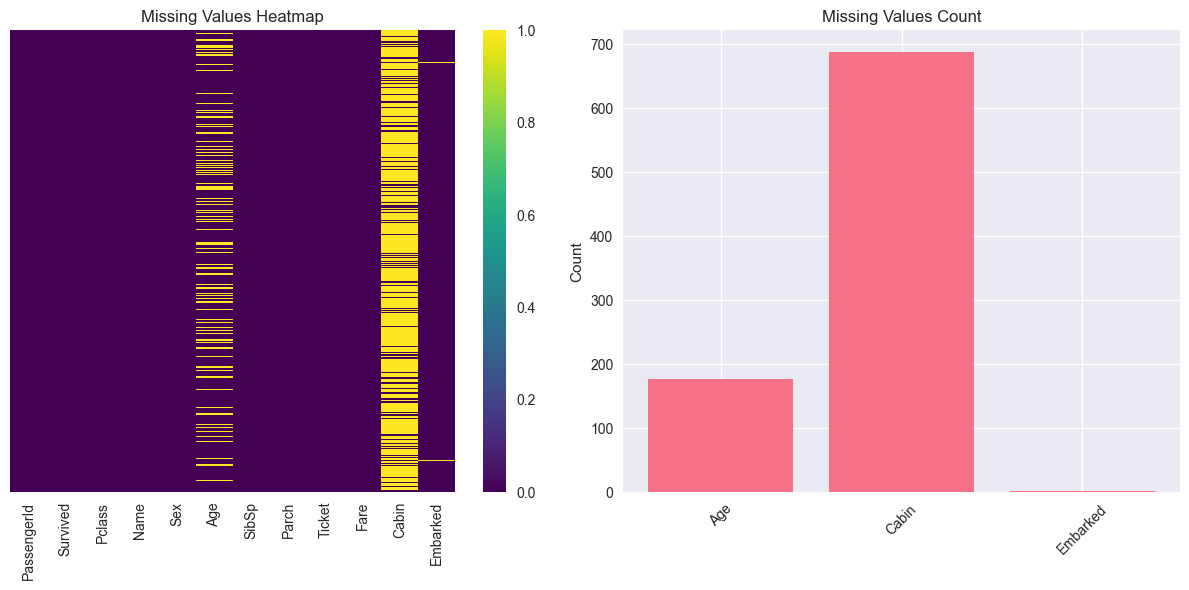

In [9]:
# Visualize missing values
plt.figure(figsize=(12, 6))

# Missing values heatmap
plt.subplot(1, 2, 1)
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')

# Missing values bar chart
plt.subplot(1, 2, 2)
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]
plt.bar(missing_counts.index, missing_counts.values)
plt.title('Missing Values Count')
plt.xticks(rotation=45)
plt.ylabel('Count')

plt.tight_layout()
plt.show()

## Basic Statistical Summary

### 📊 Number Summary

Let's get basic statistics (like average, minimum, maximum) for all the numerical data like age, fare price, etc.

In [10]:
# Numerical columns statistics
print("Numerical Columns Summary:")
display(df.describe())

Numerical Columns Summary:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### ❓ Find Missing Information

Some passengers might have missing information (like unknown age). Let's find out where data is missing so we can fix it.

In [11]:
# Categorical columns statistics
print("Categorical Columns Summary:")
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"\n{col}:")
    print(f"Unique values: {df[col].nunique()}")
    print(f"Most frequent: {df[col].mode().iloc[0] if not df[col].mode().empty else 'N/A'}")
    print(df[col].value_counts().head())
    print("-" * 40)

Categorical Columns Summary:

Name:
Unique values: 891
Most frequent: Abbing, Mr. Anthony
Name
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
Allen, Mr. William Henry                               1
Name: count, dtype: int64
----------------------------------------

Sex:
Unique values: 2
Most frequent: male
Sex
male      577
female    314
Name: count, dtype: int64
----------------------------------------

Ticket:
Unique values: 681
Most frequent: 1601
Ticket
347082      7
1601        7
CA. 2343    7
3101295     6
CA 2144     6
Name: count, dtype: int64
----------------------------------------

Cabin:
Unique values: 147
Most frequent: B96 B98
Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
Name: count, dtype: int64
----------------------------------------

Embarked:


## Survival Overview

### 🔧 Clean Up Missing Data

Now we'll fill in the missing information with reasonable guesses (like using average age for missing ages).

In [12]:
# Basic survival statistics
survival_rate = df['Survived'].mean() * 100
survivors = df['Survived'].sum()
total_passengers = len(df)

print("SURVIVAL STATISTICS")
print("=" * 30)
print(f"Total Passengers: {total_passengers}")
print(f"Survivors: {survivors}")
print(f"Non-survivors: {total_passengers - survivors}")
print(f"Overall Survival Rate: {survival_rate:.1f}%")

SURVIVAL STATISTICS
Total Passengers: 891
Survivors: 342
Non-survivors: 549
Overall Survival Rate: 38.4%


### 📈 Visualize Missing Data

Let's create a chart to see patterns in our missing data - this helps us understand if data is missing randomly or for specific reasons.

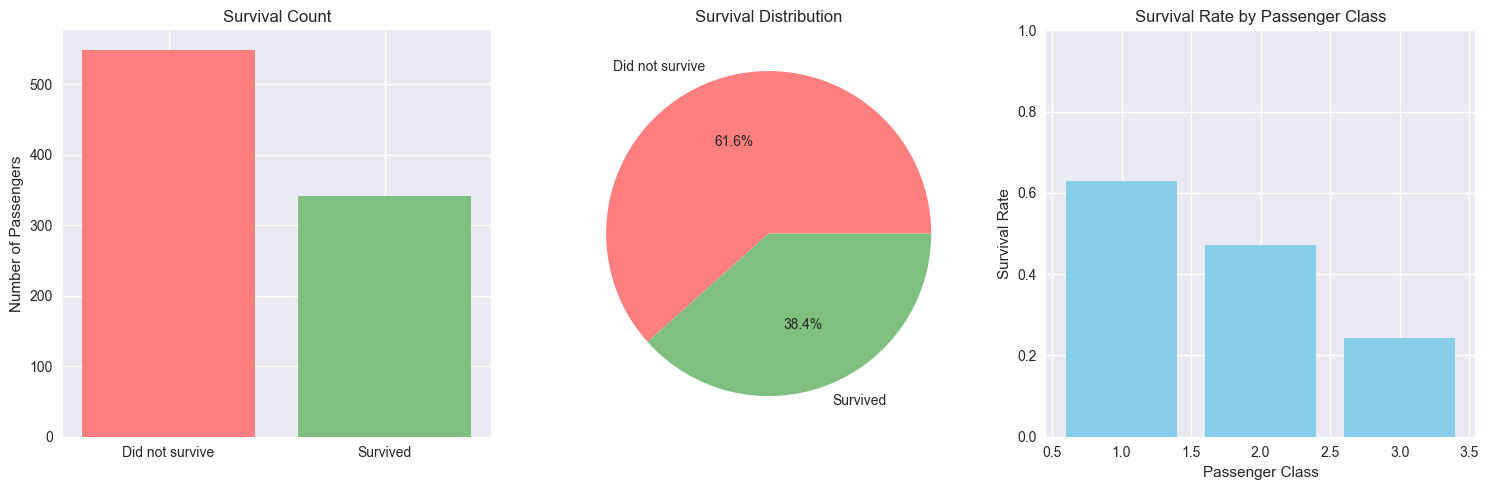

In [13]:
# Survival visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Survival count
survival_counts = df['Survived'].value_counts()
axes[0].bar(['Did not survive', 'Survived'], survival_counts.values, color=['#ff7f7f', '#7fbf7f'])
axes[0].set_title('Survival Count')
axes[0].set_ylabel('Number of Passengers')

# Survival pie chart
axes[1].pie(survival_counts.values, labels=['Did not survive', 'Survived'], 
           autopct='%1.1f%%', colors=['#ff7f7f', '#7fbf7f'])
axes[1].set_title('Survival Distribution')

# Survival by passenger class
survival_by_class = df.groupby('Pclass')['Survived'].mean()
axes[2].bar(survival_by_class.index, survival_by_class.values, color='skyblue')
axes[2].set_title('Survival Rate by Passenger Class')
axes[2].set_xlabel('Passenger Class')
axes[2].set_ylabel('Survival Rate')
axes[2].set_ylim(0, 1)

plt.tight_layout()
plt.show()

## Initial Insights

### Key Observations:
1. **Dataset Quality**: [Add observations about missing values]
2. **Survival Rate**: [Add overall survival rate insight]
3. **Class Impact**: [Add observation about passenger class and survival]
4. **Data Completeness**: [Add notes about which columns need attention]

### Next Steps:
- [ ] Handle missing values in Age, Cabin, and Embarked columns
- [ ] Create new features (family size, title extraction)
- [ ] Analyze survival patterns by different factors
- [ ] Perform statistical significance tests
- [ ] Create comprehensive visualizations

## Save Initial Analysis

In [14]:
# Save basic statistics for reference
basic_stats = {
    'total_passengers': len(df),
    'survivors': df['Survived'].sum(),
    'survival_rate': df['Survived'].mean(),
    'missing_values': df.isnull().sum().to_dict(),
    'numerical_summary': df.describe().to_dict()
}

print("Basic analysis complete!")
print("Ready for data cleaning and deeper analysis.")

Basic analysis complete!
Ready for data cleaning and deeper analysis.


# Data Cleaning and Feature Engineering

## Handle Missing Values

Now let's address the missing values we identified earlier and create new features that might be useful for analysis.

### ✨ Create New Useful Information

We'll create new pieces of information from existing data (like "family size" from number of siblings + parents) that might help us understand survival patterns better.

In [16]:
# Create a copy of the dataframe for cleaning
df_clean = df.copy()

print("Missing values before cleaning:")
print(df_clean.isnull().sum())
print("\n" + "="*50)

# 1. Handle Age missing values with median by Pclass and Sex
print("Handling Age missing values...")
age_median = df_clean.groupby(['Pclass', 'Sex'])['Age'].median()
print("Age medians by Pclass and Sex:")
print(age_median)

# Fill missing ages based on Pclass and Sex
for pclass in df_clean['Pclass'].unique():
    for sex in df_clean['Sex'].unique():
        mask = (df_clean['Pclass'] == pclass) & (df_clean['Sex'] == sex) & df_clean['Age'].isnull()
        median_age = df_clean[(df_clean['Pclass'] == pclass) & (df_clean['Sex'] == sex)]['Age'].median()
        df_clean.loc[mask, 'Age'] = median_age

print(f"Age missing values after imputation: {df_clean['Age'].isnull().sum()}")

# 2. Handle Embarked missing values with mode
print(f"\nEmbarked missing values: {df_clean['Embarked'].isnull().sum()}")
most_common_embarked = df_clean['Embarked'].mode()[0]
df_clean['Embarked'].fillna(most_common_embarked, inplace=True)
print(f"Filled with most common port: {most_common_embarked}")

# 3. Handle Cabin missing values
print(f"\nCabin missing values: {df_clean['Cabin'].isnull().sum()}")
print("We'll create a feature indicating whether cabin info is available")

print("\nMissing values after cleaning:")
print(df_clean.isnull().sum())

Missing values before cleaning:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Handling Age missing values...
Age medians by Pclass and Sex:
Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64
Age missing values after imputation: 0

Embarked missing values: 2
Filled with most common port: S

Cabin missing values: 687
We'll create a feature indicating whether cabin info is available

Missing values after cleaning:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


## Feature Engineering

Let's create new features that might help us understand survival patterns better.

### 🎯 The Main Question: Who Survived?

Now let's start answering our main question - what factors determined who survived the Titanic disaster? We'll look at survival rates by different characteristics.

In [17]:
# 1. Family Size
df_clean['FamilySize'] = df_clean['SibSp'] + df_clean['Parch'] + 1
print("Family Size distribution:")
print(df_clean['FamilySize'].value_counts().sort_index())

# 2. Is Alone
df_clean['IsAlone'] = (df_clean['FamilySize'] == 1).astype(int)
print(f"\nPassengers traveling alone: {df_clean['IsAlone'].sum()}")
print(f"Passengers with family: {len(df_clean) - df_clean['IsAlone'].sum()}")

# 3. Extract Title from Name
df_clean['Title'] = df_clean['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
print(f"\nUnique titles found: {df_clean['Title'].nunique()}")
print("Title distribution:")
print(df_clean['Title'].value_counts())

# Group rare titles
rare_titles = df_clean['Title'].value_counts()[df_clean['Title'].value_counts() < 10].index
df_clean['Title'] = df_clean['Title'].replace(rare_titles, 'Rare')
print("\nTitle distribution after grouping rare titles:")
print(df_clean['Title'].value_counts())

# 4. Has Cabin Info
df_clean['HasCabin'] = df_clean['Cabin'].notna().astype(int)
print(f"\nPassengers with cabin info: {df_clean['HasCabin'].sum()}")

# 5. Age Groups
df_clean['AgeGroup'] = pd.cut(df_clean['Age'], 
                             bins=[0, 12, 18, 35, 60, 100], 
                             labels=['Child', 'Teen', 'Adult', 'Middle Age', 'Senior'])
print(f"\nAge group distribution:")
print(df_clean['AgeGroup'].value_counts())

# 6. Fare Groups
df_clean['FareGroup'] = pd.qcut(df_clean['Fare'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
print(f"\nFare group distribution:")
print(df_clean['FareGroup'].value_counts())

print(f"\nNew dataframe shape: {df_clean.shape}")
print("New features created: FamilySize, IsAlone, Title, HasCabin, AgeGroup, FareGroup")

Family Size distribution:
FamilySize
1     537
2     161
3     102
4      29
5      15
6      22
7      12
8       6
11      7
Name: count, dtype: int64

Passengers traveling alone: 537
Passengers with family: 354

Unique titles found: 17
Title distribution:
Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

Title distribution after grouping rare titles:
Title
Mr        517
Miss      182
Mrs       125
Master     40
Rare       27
Name: count, dtype: int64

Passengers with cabin info: 204

Age group distribution:
AgeGroup
Adult         514
Middle Age    216
Teen           70
Child          69
Senior         22
Name: count, dtype: int64

Fare group distribution:
FareGroup
Medium       224
Low          223
High         222
Very High    222


# Survival Analysis by Different Factors

Now let's analyze how different factors affected survival rates.

### 📊 Test Our Theories Scientifically

Let's use statistical tests to see if our observations (like "women survived more than men") are actually statistically significant or just random chance.

In [18]:
# Calculate survival rates by different factors
def survival_by_factor(factor_name):
    survival_rate = df_clean.groupby(factor_name)['Survived'].agg(['count', 'sum', 'mean'])
    survival_rate.columns = ['Total', 'Survivors', 'Survival_Rate']
    survival_rate['Survival_Rate'] = survival_rate['Survival_Rate'] * 100
    return survival_rate.round(2)

factors_to_analyze = ['Sex', 'Pclass', 'AgeGroup', 'FareGroup', 'Title', 'IsAlone', 'HasCabin', 'Embarked']

print("SURVIVAL RATES BY DIFFERENT FACTORS")
print("=" * 60)

for factor in factors_to_analyze:
    print(f"\n{factor.upper()}:")
    print(survival_by_factor(factor))
    print("-" * 40)

SURVIVAL RATES BY DIFFERENT FACTORS

SEX:
        Total  Survivors  Survival_Rate
Sex                                    
female    314        233          74.20
male      577        109          18.89
----------------------------------------

PCLASS:
        Total  Survivors  Survival_Rate
Pclass                                 
1         216        136          62.96
2         184         87          47.28
3         491        119          24.24
----------------------------------------

AGEGROUP:
            Total  Survivors  Survival_Rate
AgeGroup                                   
Child          69         40          57.97
Teen           70         30          42.86
Adult         514        184          35.80
Middle Age    216         83          38.43
Senior         22          5          22.73
----------------------------------------

FAREGROUP:
           Total  Survivors  Survival_Rate
FareGroup                                 
Low          223         44          19.73
Medium

## Comprehensive Visualizations

### 🎨 Create Beautiful Charts

Time to create professional-looking charts that clearly show our findings. These will help tell the story of what happened on the Titanic.

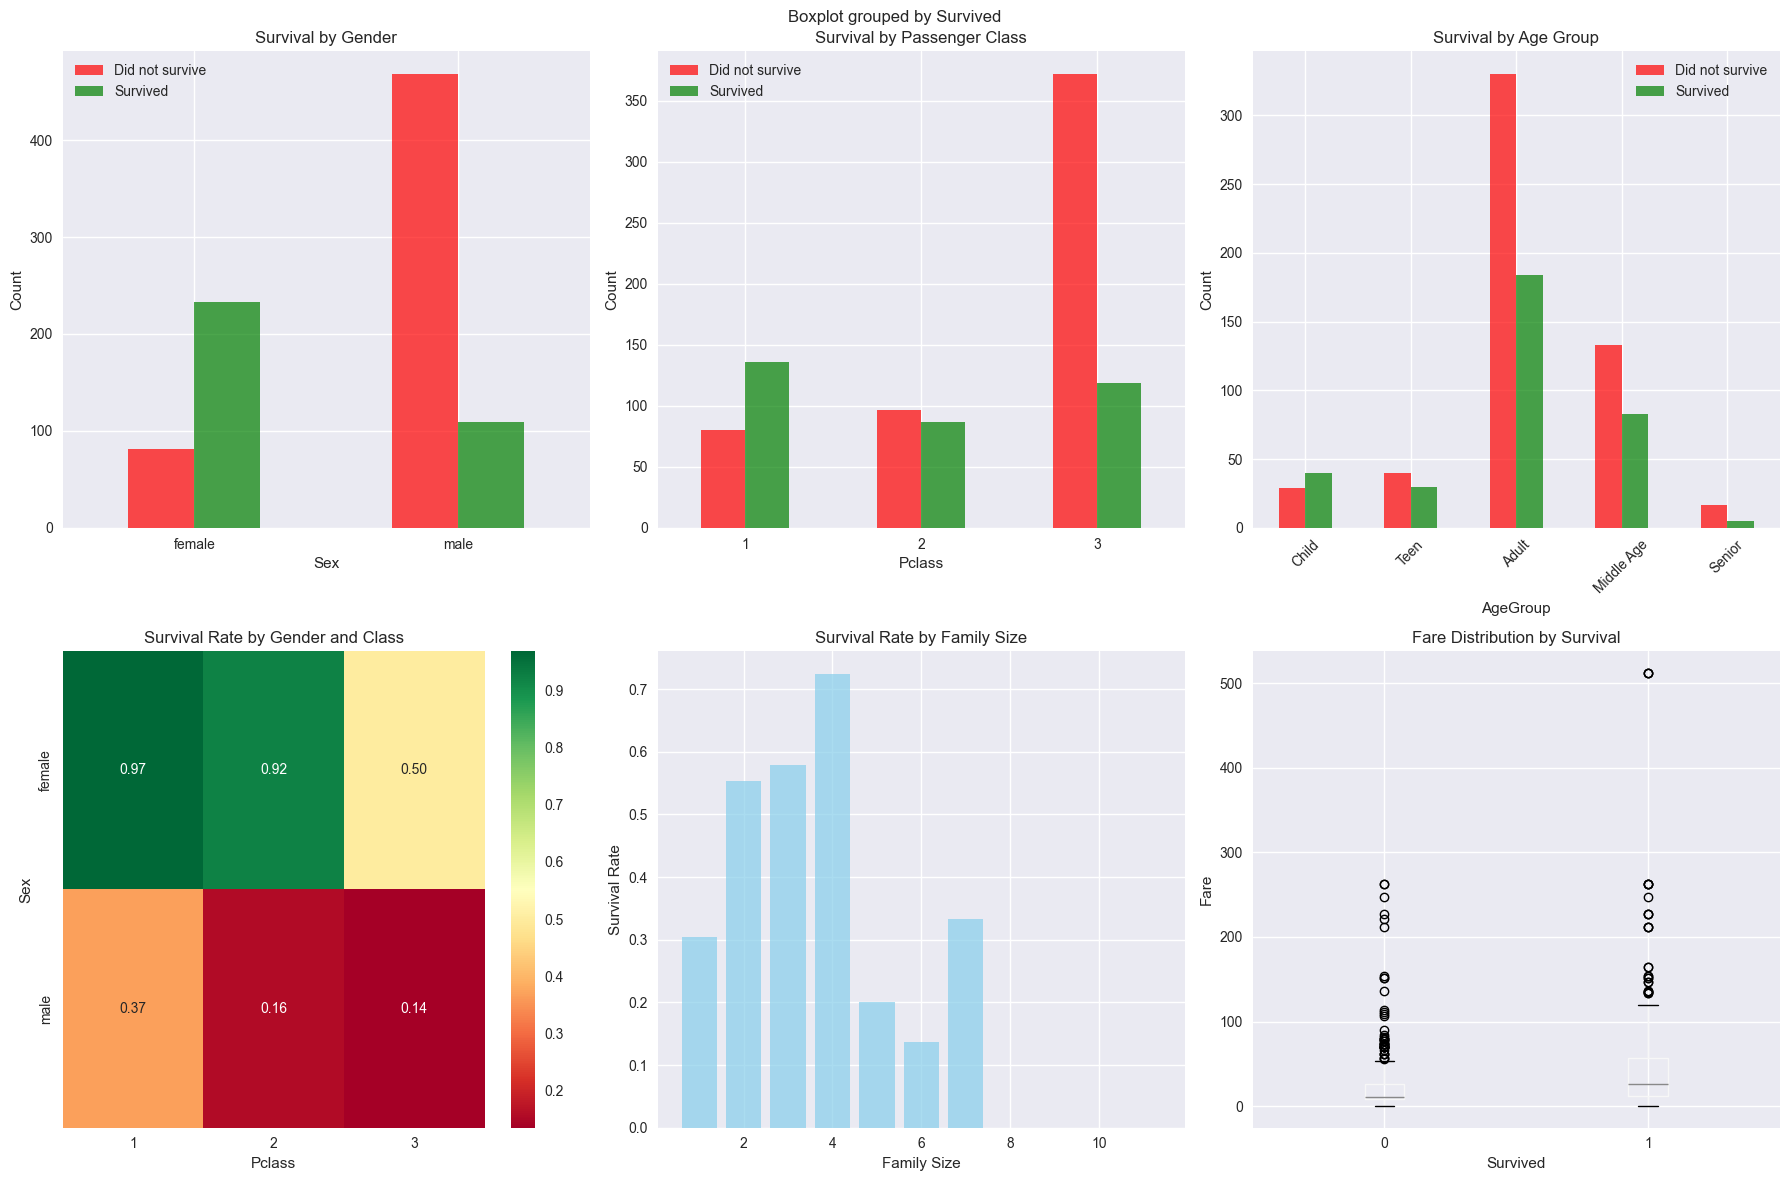

In [19]:
# Create comprehensive survival visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Survival Analysis by Key Factors', fontsize=16, fontweight='bold')

# 1. Survival by Sex
survival_sex = df_clean.groupby(['Sex', 'Survived']).size().unstack()
survival_sex.plot(kind='bar', ax=axes[0,0], color=['red', 'green'], alpha=0.7)
axes[0,0].set_title('Survival by Gender')
axes[0,0].set_ylabel('Count')
axes[0,0].legend(['Did not survive', 'Survived'])
axes[0,0].tick_params(axis='x', rotation=0)

# 2. Survival by Passenger Class
survival_pclass = df_clean.groupby(['Pclass', 'Survived']).size().unstack()
survival_pclass.plot(kind='bar', ax=axes[0,1], color=['red', 'green'], alpha=0.7)
axes[0,1].set_title('Survival by Passenger Class')
axes[0,1].set_ylabel('Count')
axes[0,1].legend(['Did not survive', 'Survived'])
axes[0,1].tick_params(axis='x', rotation=0)

# 3. Survival by Age Group
survival_age = df_clean.groupby(['AgeGroup', 'Survived']).size().unstack()
survival_age.plot(kind='bar', ax=axes[0,2], color=['red', 'green'], alpha=0.7)
axes[0,2].set_title('Survival by Age Group')
axes[0,2].set_ylabel('Count')
axes[0,2].legend(['Did not survive', 'Survived'])
axes[0,2].tick_params(axis='x', rotation=45)

# 4. Survival Rate by Sex and Class
survival_rate_sex_class = df_clean.groupby(['Sex', 'Pclass'])['Survived'].mean().unstack()
sns.heatmap(survival_rate_sex_class, annot=True, fmt='.2f', cmap='RdYlGn', ax=axes[1,0])
axes[1,0].set_title('Survival Rate by Gender and Class')

# 5. Family Size vs Survival
family_survival = df_clean.groupby('FamilySize')['Survived'].mean()
axes[1,1].bar(family_survival.index, family_survival.values, color='skyblue', alpha=0.7)
axes[1,1].set_title('Survival Rate by Family Size')
axes[1,1].set_xlabel('Family Size')
axes[1,1].set_ylabel('Survival Rate')

# 6. Fare vs Survival
df_clean.boxplot(column='Fare', by='Survived', ax=axes[1,2])
axes[1,2].set_title('Fare Distribution by Survival')
axes[1,2].set_xlabel('Survived')
axes[1,2].set_ylabel('Fare')

plt.tight_layout()
plt.show()

## Statistical Significance Tests

Let's perform statistical tests to determine which factors significantly affect survival.

### Chi-Square Tests

Perform statistical tests to determine which factors significantly affect survival.

In [20]:
# Perform Chi-square tests for categorical variables
from scipy.stats import chi2_contingency

categorical_features = ['Sex', 'Pclass', 'AgeGroup', 'Title', 'IsAlone', 'HasCabin', 'Embarked']

print("CHI-SQUARE TESTS FOR SURVIVAL INDEPENDENCE")
print("=" * 60)
print("H0: Factor is independent of survival")
print("H1: Factor is dependent on survival")
print("Significance level: α = 0.05")
print("=" * 60)

significant_factors = []

for feature in categorical_features:
    # Create contingency table
    contingency_table = pd.crosstab(df_clean[feature], df_clean['Survived'])
    
    # Perform chi-square test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Determine significance
    is_significant = p_value < 0.05
    if is_significant:
        significant_factors.append(feature)
    
    print(f"\n{feature}:")
    print(f"  Chi-square statistic: {chi2:.4f}")
    print(f"  p-value: {p_value:.6f}")
    print(f"  Degrees of freedom: {dof}")
    print(f"  Significant: {'Yes' if is_significant else 'No'}")

print(f"\n\nSIGNIFICANT FACTORS (p < 0.05):")
for factor in significant_factors:
    print(f"- {factor}")
    
print(f"\nTotal significant factors: {len(significant_factors)} out of {len(categorical_features)}")

CHI-SQUARE TESTS FOR SURVIVAL INDEPENDENCE
H0: Factor is independent of survival
H1: Factor is dependent on survival
Significance level: α = 0.05

Sex:
  Chi-square statistic: 260.7170
  p-value: 0.000000
  Degrees of freedom: 1
  Significant: Yes

Pclass:
  Chi-square statistic: 102.8890
  p-value: 0.000000
  Degrees of freedom: 2
  Significant: Yes

AgeGroup:
  Chi-square statistic: 15.5193
  p-value: 0.003737
  Degrees of freedom: 4
  Significant: Yes

Title:
  Chi-square statistic: 283.3115
  p-value: 0.000000
  Degrees of freedom: 4
  Significant: Yes

IsAlone:
  Chi-square statistic: 36.0005
  p-value: 0.000000
  Degrees of freedom: 1
  Significant: Yes

HasCabin:
  Chi-square statistic: 87.9415
  p-value: 0.000000
  Degrees of freedom: 1
  Significant: Yes

Embarked:
  Chi-square statistic: 25.9645
  p-value: 0.000002
  Degrees of freedom: 2
  Significant: Yes


SIGNIFICANT FACTORS (p < 0.05):
- Sex
- Pclass
- AgeGroup
- Title
- IsAlone
- HasCabin
- Embarked

Total significant f

### 📝 Summary of What We Discovered

Let's compile all our findings into a clear summary of the most important insights about Titanic survival patterns.

In [21]:
# Generate comprehensive summary
print("TITANIC SURVIVAL ANALYSIS - KEY FINDINGS")
print("=" * 50)

# Overall statistics
total_passengers = len(df_clean)
total_survivors = df_clean['Survived'].sum()
overall_survival_rate = df_clean['Survived'].mean() * 100

print(f"\nOVERALL STATISTICS:")
print(f"• Total passengers analyzed: {total_passengers}")
print(f"• Total survivors: {total_survivors}")
print(f"• Overall survival rate: {overall_survival_rate:.1f}%")

# Key survival rates by major factors
print(f"\nKEY SURVIVAL RATES:")
print(f"• Female survival rate: {df_clean[df_clean['Sex'] == 'female']['Survived'].mean() * 100:.1f}%")
print(f"• Male survival rate: {df_clean[df_clean['Sex'] == 'male']['Survived'].mean() * 100:.1f}%")
print(f"• 1st class survival rate: {df_clean[df_clean['Pclass'] == 1]['Survived'].mean() * 100:.1f}%")
print(f"• 2nd class survival rate: {df_clean[df_clean['Pclass'] == 2]['Survived'].mean() * 100:.1f}%")
print(f"• 3rd class survival rate: {df_clean[df_clean['Pclass'] == 3]['Survived'].mean() * 100:.1f}%")
print(f"• Children survival rate: {df_clean[df_clean['AgeGroup'] == 'Child']['Survived'].mean() * 100:.1f}%")

# Most important factors
print(f"\nDATA QUALITY INSIGHTS:")
print(f"• Age had {df['Age'].isnull().sum()} missing values ({df['Age'].isnull().sum()/len(df)*100:.1f}%)")
print(f"• Cabin had {df['Cabin'].isnull().sum()} missing values ({df['Cabin'].isnull().sum()/len(df)*100:.1f}%)")
print(f"• Embarked had {df['Embarked'].isnull().sum()} missing values")

print(f"\nFAMILY INSIGHTS:")
alone_survival = df_clean[df_clean['IsAlone'] == 1]['Survived'].mean() * 100
family_survival = df_clean[df_clean['IsAlone'] == 0]['Survived'].mean() * 100
print(f"• Passengers traveling alone: {df_clean['IsAlone'].sum()} ({df_clean['IsAlone'].mean()*100:.1f}%)")
print(f"• Alone survival rate: {alone_survival:.1f}%")
print(f"• With family survival rate: {family_survival:.1f}%")

print(f"\nRECOMMENDations FOR FURTHER ANALYSIS:")
print("• Build predictive models using cleaned features")
print("• Investigate specific survival stories by passenger class and gender")
print("• Analyze fare patterns and their relationship to survival")
print("• Study the impact of embarkation port on passenger demographics")

TITANIC SURVIVAL ANALYSIS - KEY FINDINGS

OVERALL STATISTICS:
• Total passengers analyzed: 891
• Total survivors: 342
• Overall survival rate: 38.4%

KEY SURVIVAL RATES:
• Female survival rate: 74.2%
• Male survival rate: 18.9%
• 1st class survival rate: 63.0%
• 2nd class survival rate: 47.3%
• 3rd class survival rate: 24.2%
• Children survival rate: 58.0%

DATA QUALITY INSIGHTS:
• Age had 177 missing values (19.9%)
• Cabin had 687 missing values (77.1%)
• Embarked had 2 missing values

FAMILY INSIGHTS:
• Passengers traveling alone: 537 (60.3%)
• Alone survival rate: 30.4%
• With family survival rate: 50.6%

RECOMMENDations FOR FURTHER ANALYSIS:
• Build predictive models using cleaned features
• Investigate specific survival stories by passenger class and gender
• Analyze fare patterns and their relationship to survival
• Study the impact of embarkation port on passenger demographics


### 📊 Final Summary Report

Let's put together all our key findings in one place - like writing a conclusion for our investigation.

In [22]:
# Save the cleaned dataset for future analysis
print("Saving cleaned dataset...")
df_clean.to_csv('../data/processed/titanic_cleaned.csv', index=False)
print("Cleaned dataset saved to: ../data/processed/titanic_cleaned.csv")

print(f"\nFinal cleaned dataset shape: {df_clean.shape}")
print("Features in cleaned dataset:")
for i, col in enumerate(df_clean.columns, 1):
    print(f"{i:2d}. {col}")

print("\nAnalysis complete! The dataset is now ready for machine learning modeling.")

Saving cleaned dataset...
Cleaned dataset saved to: ../data/processed/titanic_cleaned.csv

Final cleaned dataset shape: (891, 18)
Features in cleaned dataset:
 1. PassengerId
 2. Survived
 3. Pclass
 4. Name
 5. Sex
 6. Age
 7. SibSp
 8. Parch
 9. Ticket
10. Fare
11. Cabin
12. Embarked
13. FamilySize
14. IsAlone
15. Title
16. HasCabin
17. AgeGroup
18. FareGroup

Analysis complete! The dataset is now ready for machine learning modeling.


### 🎛️ Prepare for High-Quality Charts

Let's set up our chart-making tools to create professional-looking visualizations that we can use in reports.

In [23]:
# Configure matplotlib for high-quality figure saving
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['savefig.facecolor'] = 'white'

# Create figures directory if it doesn't exist
import os
os.makedirs('../reports/figures', exist_ok=True)

print("Generating and saving all visualizations...")
print("=" * 50)

Generating and saving all visualizations...


### 👥 Chart 1: Who Was on the Titanic?

Create charts showing the basic demographics - how many men vs women, age distribution, and passenger classes.

✅ Saved: 01_overview_survival_stats.png


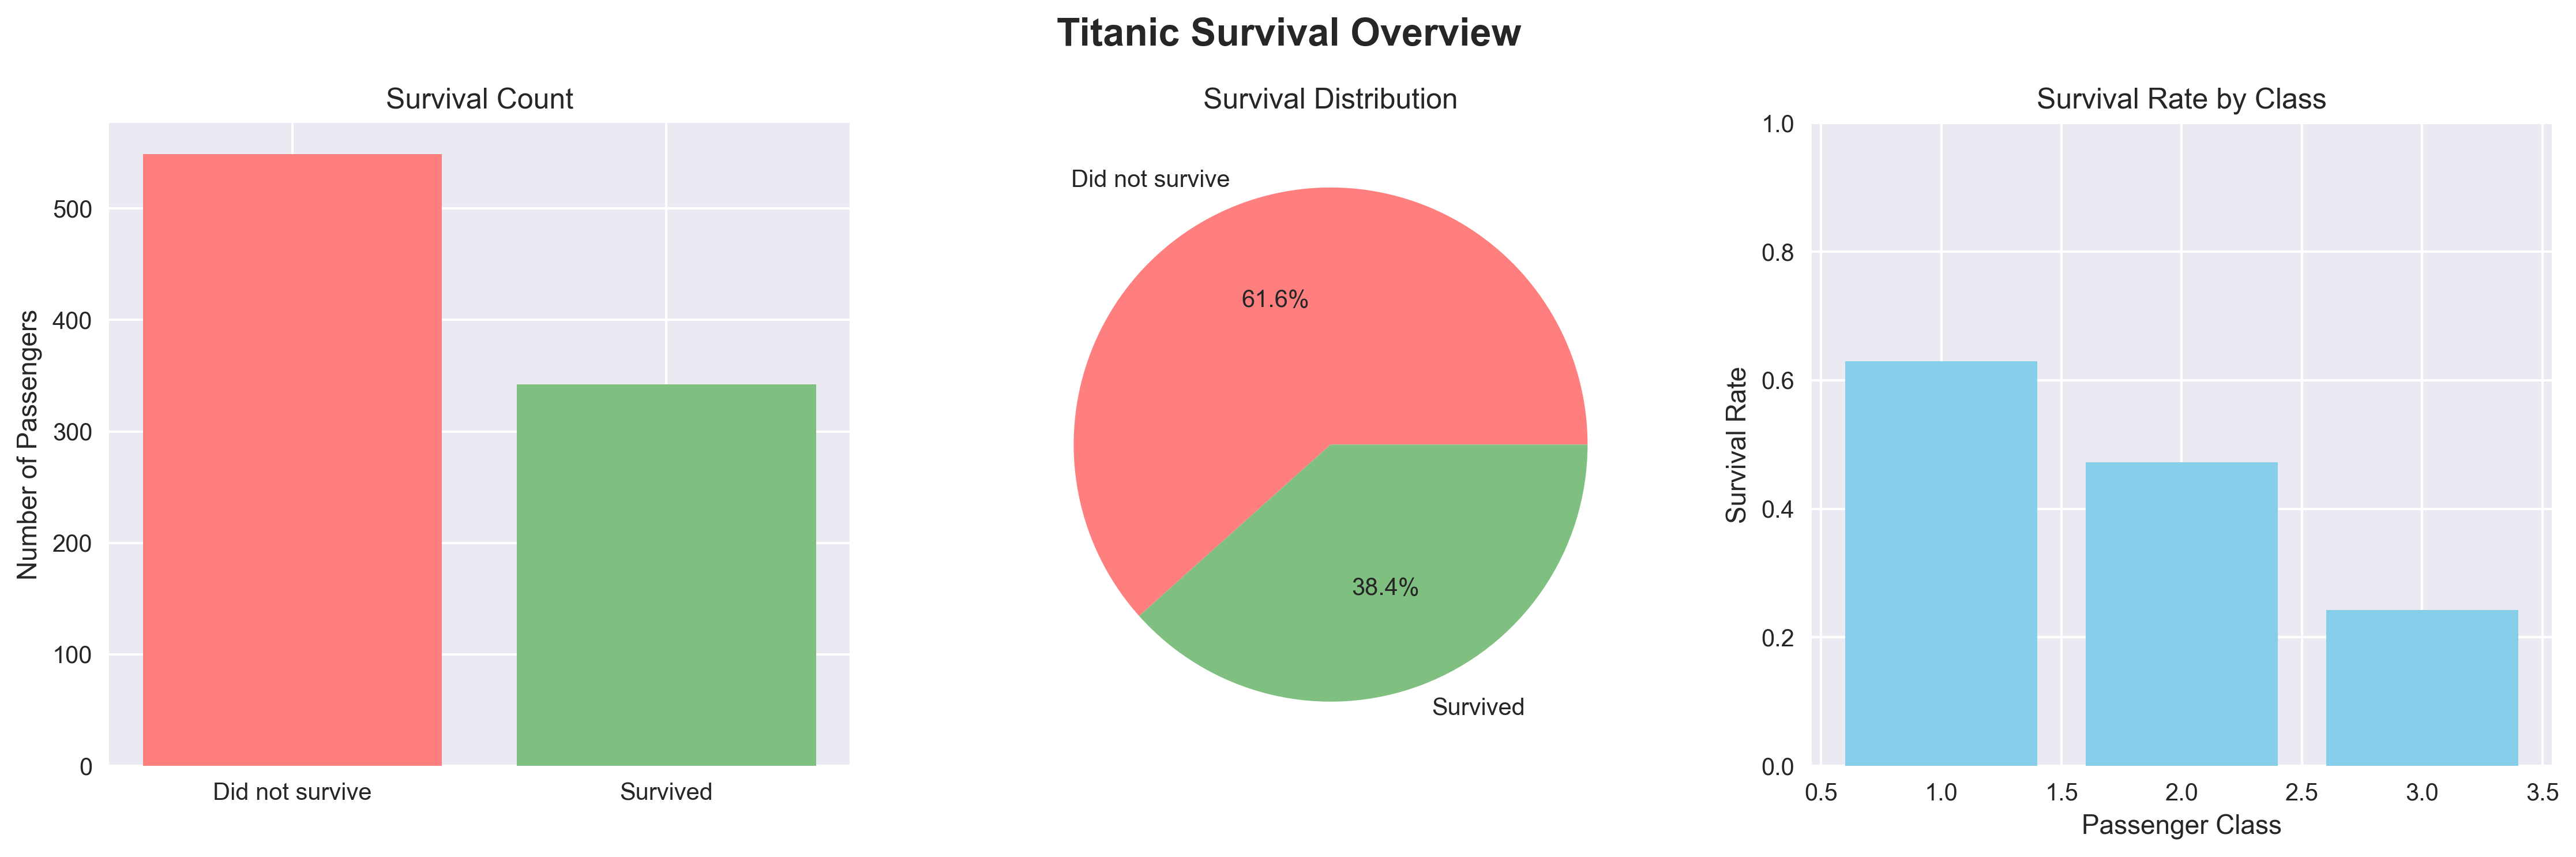

In [24]:
# 1. Overall Survival Statistics
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Titanic Survival Overview', fontsize=16, fontweight='bold')

# Survival count
survival_counts = df_clean['Survived'].value_counts()
axes[0].bar(['Did not survive', 'Survived'], survival_counts.values, color=['#ff7f7f', '#7fbf7f'])
axes[0].set_title('Survival Count')
axes[0].set_ylabel('Number of Passengers')

# Survival pie chart
axes[1].pie(survival_counts.values, labels=['Did not survive', 'Survived'], 
           autopct='%1.1f%%', colors=['#ff7f7f', '#7fbf7f'])
axes[1].set_title('Survival Distribution')

# Survival by passenger class
survival_by_class = df_clean.groupby('Pclass')['Survived'].mean()
axes[2].bar(survival_by_class.index, survival_by_class.values, color='skyblue')
axes[2].set_title('Survival Rate by Class')
axes[2].set_xlabel('Passenger Class')
axes[2].set_ylabel('Survival Rate')
axes[2].set_ylim(0, 1)

plt.tight_layout()
plt.savefig('../reports/figures/01_overview_survival_stats.png', dpi=300, bbox_inches='tight')
print("✅ Saved: 01_overview_survival_stats.png")
plt.show()

### 📉 Chart 2: Where Was Information Missing?

Show patterns in missing data - this helps us understand if certain types of passengers had missing information.

✅ Saved: 02_missing_values_analysis.png


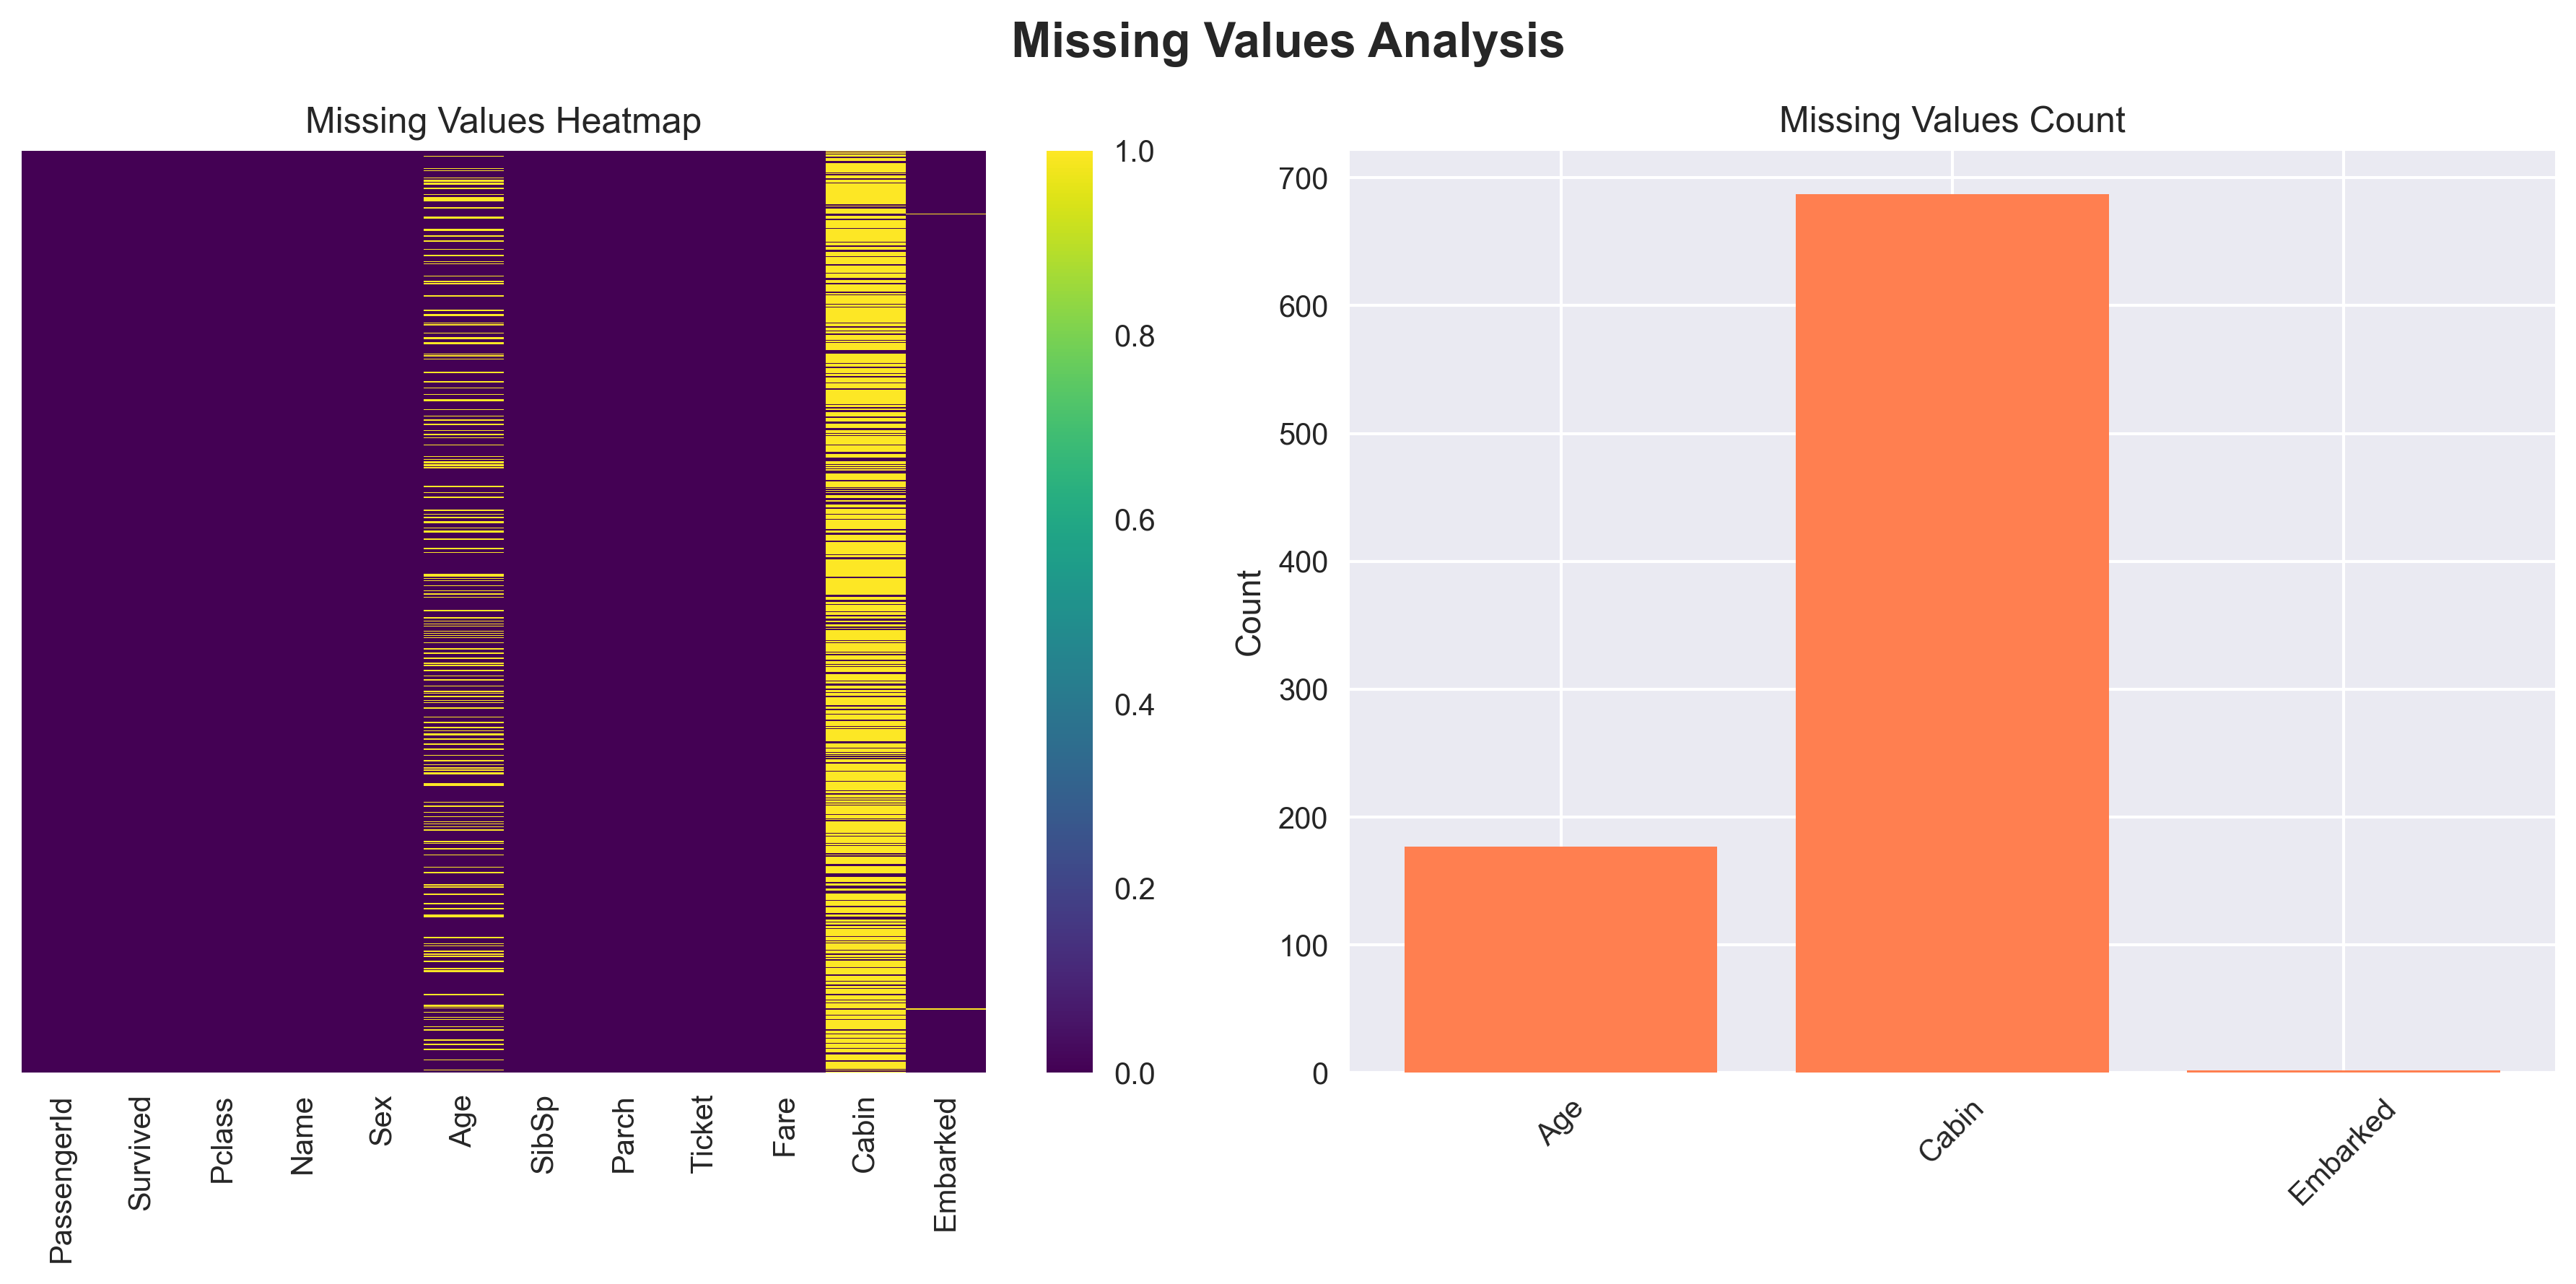

In [25]:
# 2. Missing Values Analysis
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Missing Values Analysis', fontsize=16, fontweight='bold')

# Missing values heatmap
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis', ax=axes[0])
axes[0].set_title('Missing Values Heatmap')

# Missing values bar chart
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]
axes[1].bar(missing_counts.index, missing_counts.values, color='coral')
axes[1].set_title('Missing Values Count')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.savefig('../reports/figures/02_missing_values_analysis.png', dpi=300, bbox_inches='tight')
print("✅ Saved: 02_missing_values_analysis.png")
plt.show()

### 🎯 Chart 3: Survival Rates by Key Factors

Show who was more likely to survive based on gender, class, and where they boarded the ship.

✅ Saved: 03_demographics_breakdown.png


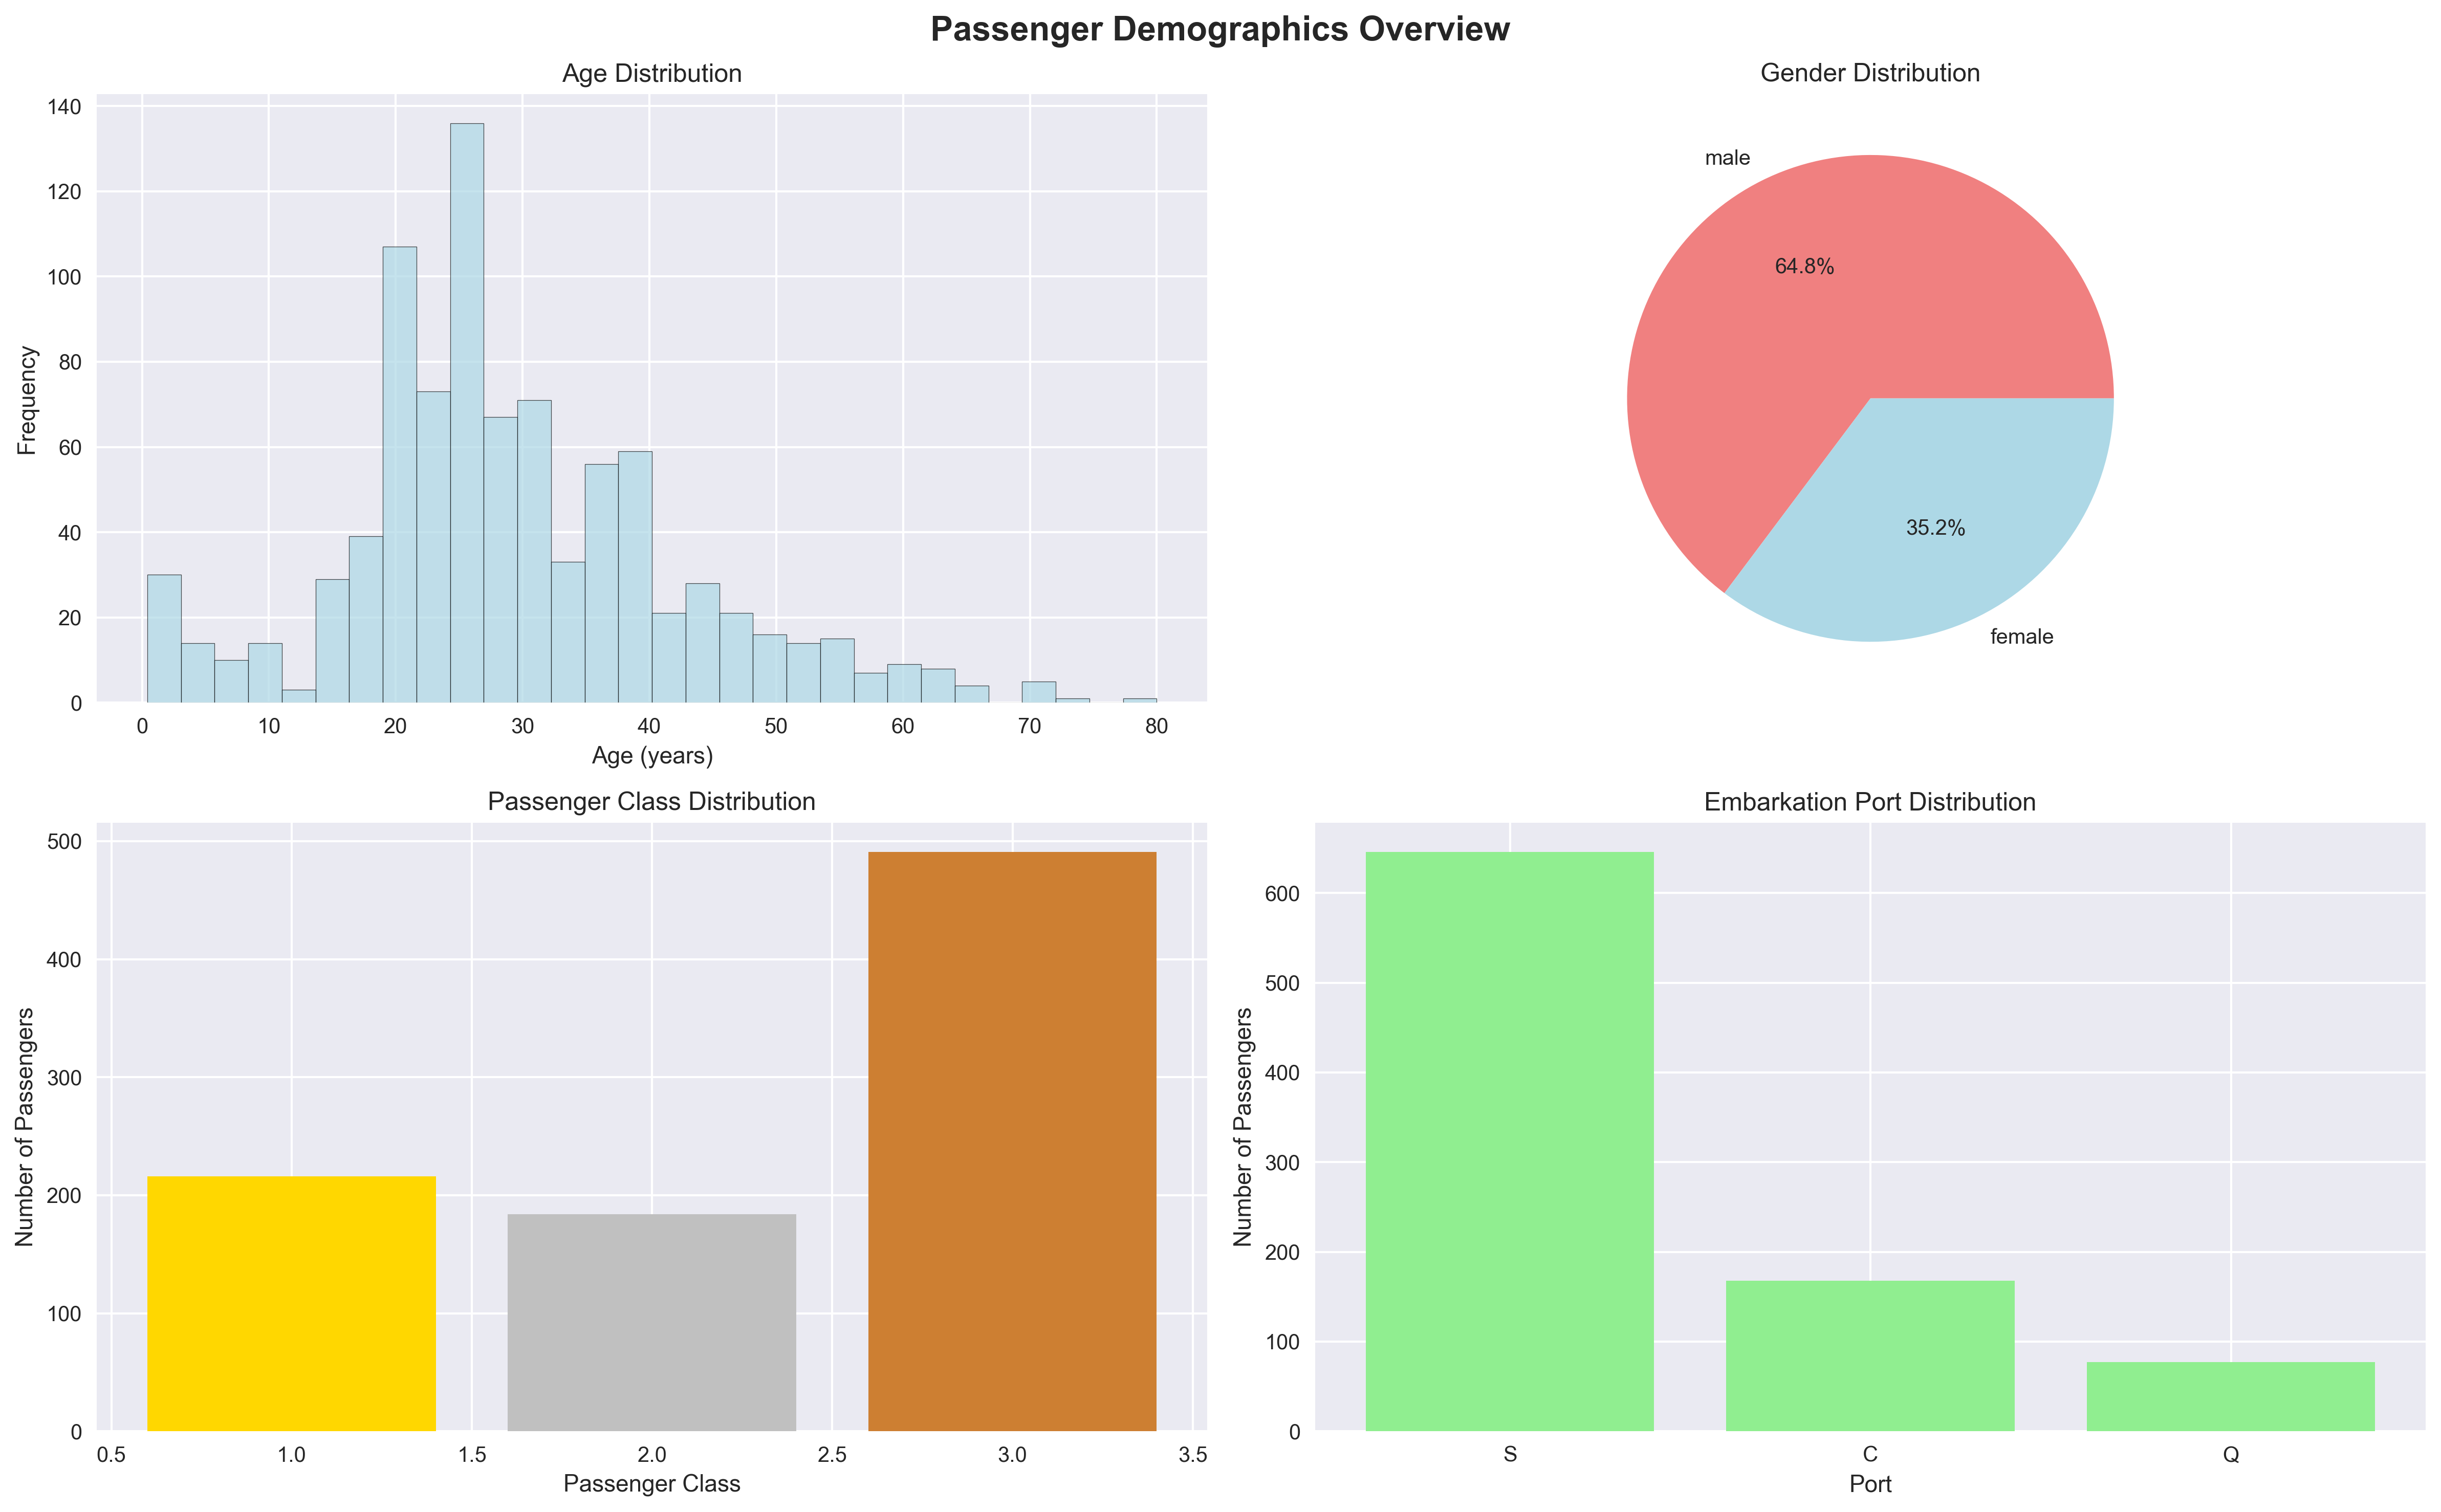

In [31]:
# 3. Demographics Breakdown
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Passenger Demographics Overview', fontsize=16, fontweight='bold')

# Age distribution
axes[0,0].hist(df_clean['Age'].dropna(), bins=30, color='lightblue', alpha=0.7, edgecolor='black')
axes[0,0].set_title('Age Distribution')
axes[0,0].set_xlabel('Age (years)')
axes[0,0].set_ylabel('Frequency')

# Gender distribution
gender_counts = df_clean['Sex'].value_counts()
axes[0,1].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', 
              colors=['lightcoral', 'lightblue'])
axes[0,1].set_title('Gender Distribution')

# Class distribution
class_counts = df_clean['Pclass'].value_counts().sort_index()
axes[1,0].bar(class_counts.index, class_counts.values, color=['#FFD700', '#C0C0C0', '#CD7F32'])
axes[1,0].set_title('Passenger Class Distribution')
axes[1,0].set_xlabel('Passenger Class')
axes[1,0].set_ylabel('Number of Passengers')

# Embarkation port distribution
embark_counts = df_clean['Embarked'].value_counts()
axes[1,1].bar(embark_counts.index, embark_counts.values, color='lightgreen')
axes[1,1].set_title('Embarkation Port Distribution')
axes[1,1].set_xlabel('Port')
axes[1,1].set_ylabel('Number of Passengers')

plt.tight_layout()
plt.savefig('../reports/figures/03_demographics_breakdown.png', dpi=300, bbox_inches='tight')
print("✅ Saved: 03_demographics_breakdown.png")
plt.show()

### 📊 Chart 4: How Features Connect to Each Other

Create charts showing relationships between different passenger characteristics (like age vs fare price) and how they relate to survival.

✅ Saved: 04_comprehensive_survival_analysis.png


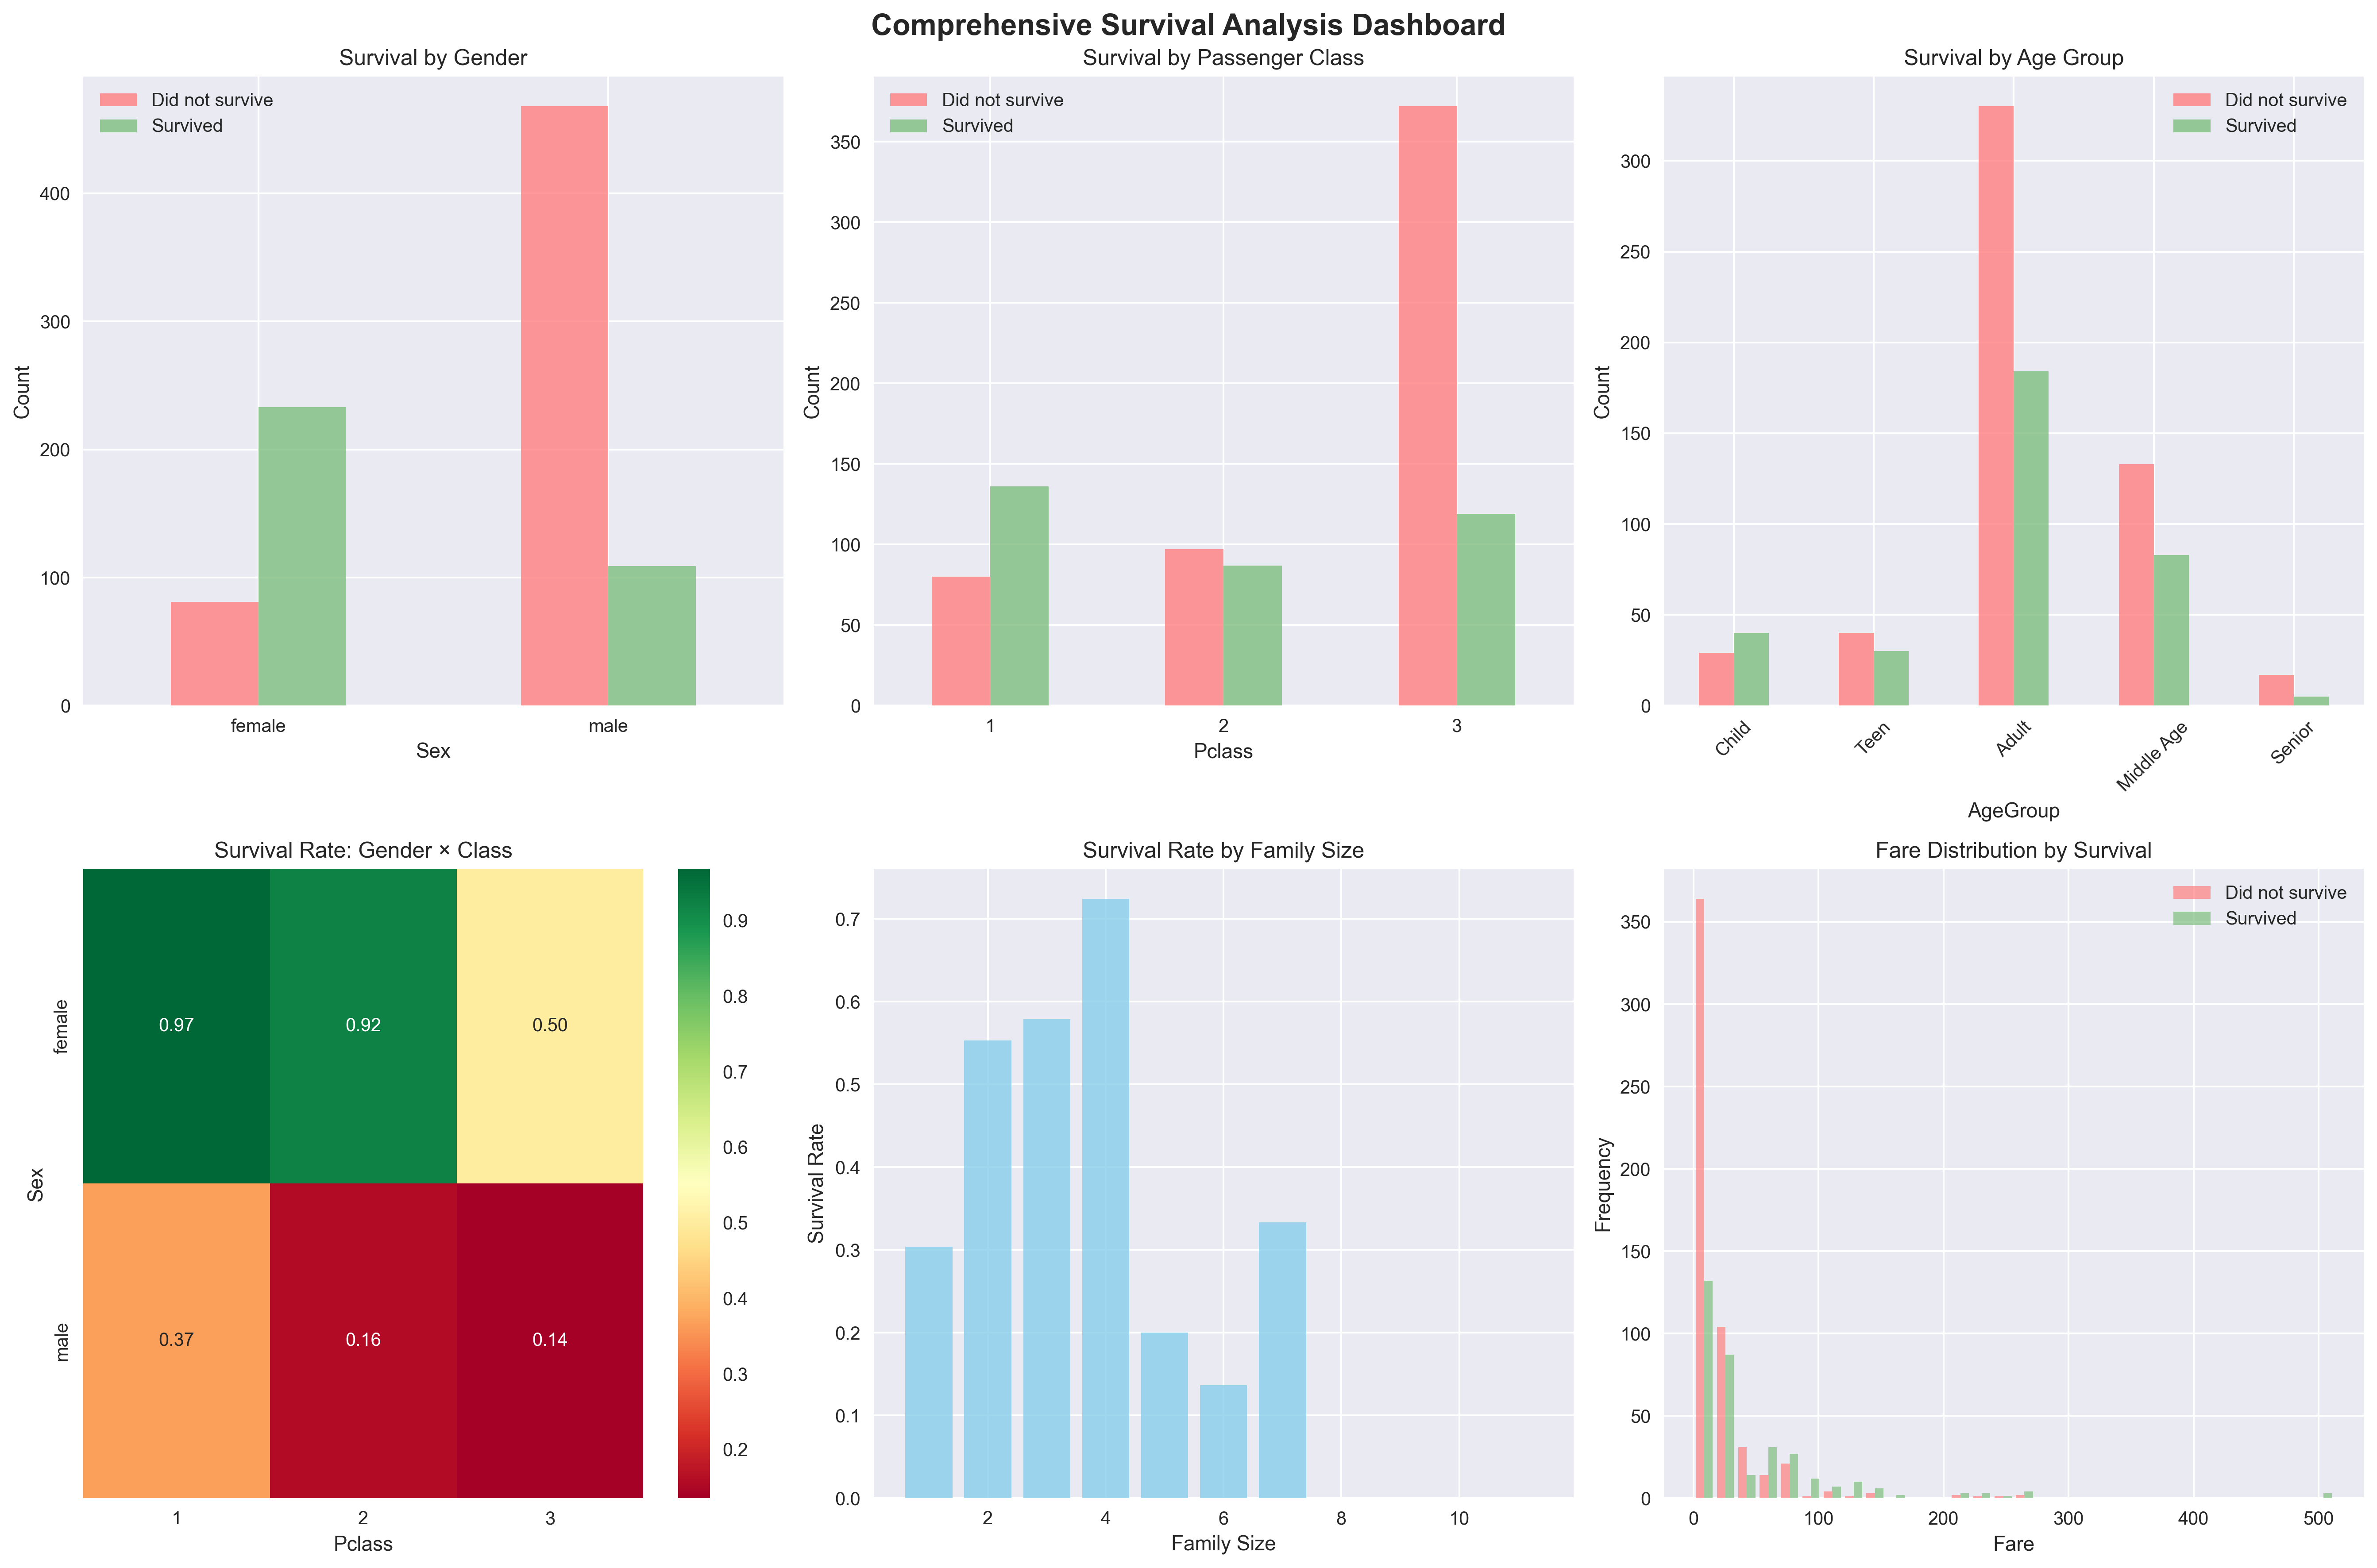

In [27]:
# 4. Comprehensive Survival Analysis (6-Panel Dashboard)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Comprehensive Survival Analysis Dashboard', fontsize=16, fontweight='bold')

# Panel 1: Survival by Gender
survival_sex = df_clean.groupby(['Sex', 'Survived']).size().unstack()
survival_sex.plot(kind='bar', ax=axes[0,0], color=['#ff7f7f', '#7fbf7f'], alpha=0.8)
axes[0,0].set_title('Survival by Gender')
axes[0,0].set_ylabel('Count')
axes[0,0].legend(['Did not survive', 'Survived'])
axes[0,0].tick_params(axis='x', rotation=0)

# Panel 2: Survival by Class
survival_pclass = df_clean.groupby(['Pclass', 'Survived']).size().unstack()
survival_pclass.plot(kind='bar', ax=axes[0,1], color=['#ff7f7f', '#7fbf7f'], alpha=0.8)
axes[0,1].set_title('Survival by Passenger Class')
axes[0,1].set_ylabel('Count')
axes[0,1].legend(['Did not survive', 'Survived'])
axes[0,1].tick_params(axis='x', rotation=0)

# Panel 3: Survival by Age Group
survival_age = df_clean.groupby(['AgeGroup', 'Survived']).size().unstack()
survival_age.plot(kind='bar', ax=axes[0,2], color=['#ff7f7f', '#7fbf7f'], alpha=0.8)
axes[0,2].set_title('Survival by Age Group')
axes[0,2].set_ylabel('Count')
axes[0,2].legend(['Did not survive', 'Survived'])
axes[0,2].tick_params(axis='x', rotation=45)

# Panel 4: Survival Rate Heatmap
survival_rate_sex_class = df_clean.groupby(['Sex', 'Pclass'])['Survived'].mean().unstack()
sns.heatmap(survival_rate_sex_class, annot=True, fmt='.2f', cmap='RdYlGn', ax=axes[1,0])
axes[1,0].set_title('Survival Rate: Gender × Class')

# Panel 5: Family Size vs Survival
family_survival = df_clean.groupby('FamilySize')['Survived'].mean()
axes[1,1].bar(family_survival.index, family_survival.values, color='skyblue', alpha=0.8)
axes[1,1].set_title('Survival Rate by Family Size')
axes[1,1].set_xlabel('Family Size')
axes[1,1].set_ylabel('Survival Rate')

# Panel 6: Fare Distribution by Survival
survived_fares = df_clean[df_clean['Survived'] == 1]['Fare']
not_survived_fares = df_clean[df_clean['Survived'] == 0]['Fare']
axes[1,2].hist([not_survived_fares, survived_fares], bins=30, alpha=0.7, 
               color=['#ff7f7f', '#7fbf7f'], label=['Did not survive', 'Survived'])
axes[1,2].set_title('Fare Distribution by Survival')
axes[1,2].set_xlabel('Fare')
axes[1,2].set_ylabel('Frequency')
axes[1,2].legend()

plt.tight_layout()
plt.savefig('../reports/figures/04_comprehensive_survival_analysis.png', dpi=300, bbox_inches='tight')
print("✅ Saved: 04_comprehensive_survival_analysis.png")
plt.show()

### 🔥 Chart 5: Complete Survival Dashboard

Create a comprehensive 6-panel dashboard showing all the most important survival patterns in one view.

✅ Saved: 05_family_composition_analysis.png


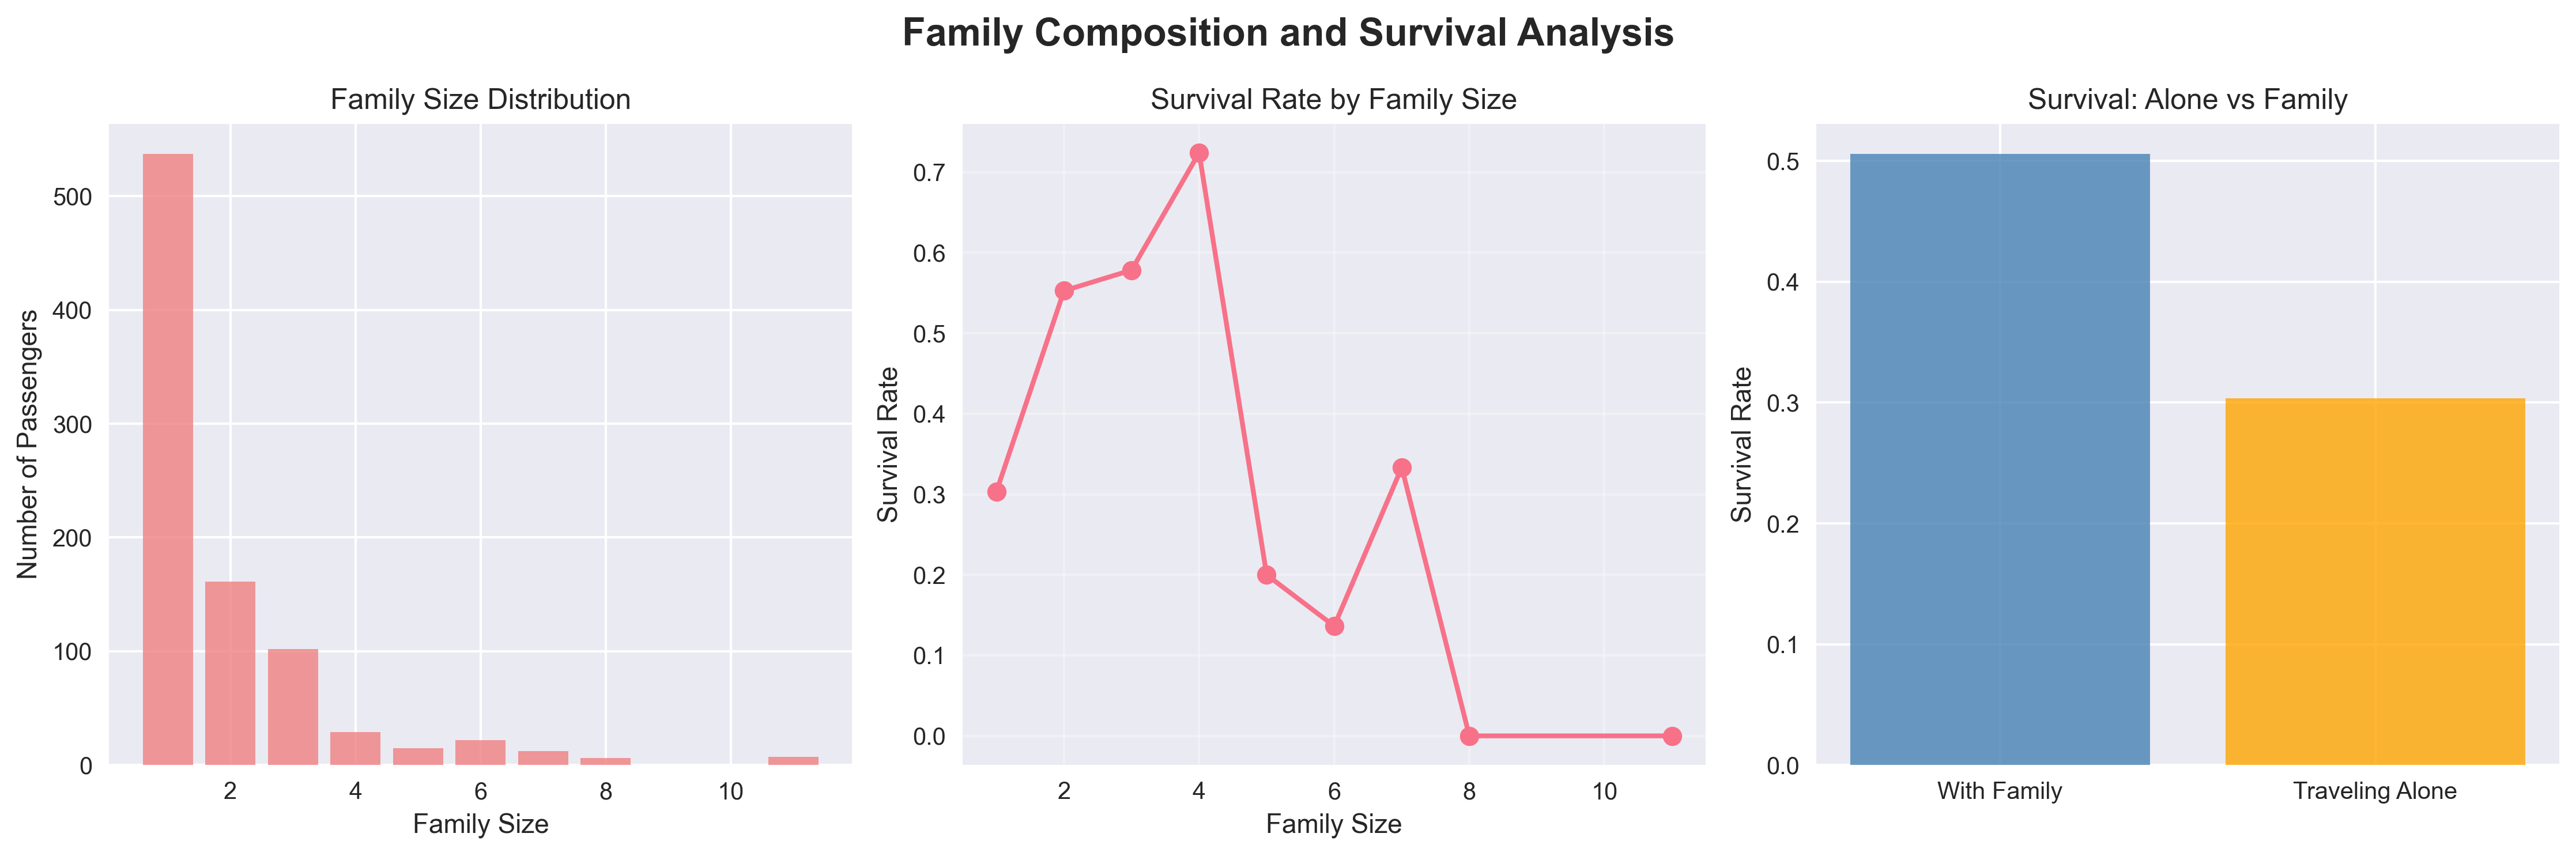

In [28]:
# 5. Family Composition Analysis
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Family Composition and Survival Analysis', fontsize=16, fontweight='bold')

# Family size distribution
family_dist = df_clean['FamilySize'].value_counts().sort_index()
axes[0].bar(family_dist.index, family_dist.values, color='lightcoral', alpha=0.8)
axes[0].set_title('Family Size Distribution')
axes[0].set_xlabel('Family Size')
axes[0].set_ylabel('Number of Passengers')

# Survival rate by family size
family_survival = df_clean.groupby('FamilySize')['Survived'].mean()
axes[1].plot(family_survival.index, family_survival.values, marker='o', linewidth=2, markersize=8)
axes[1].set_title('Survival Rate by Family Size')
axes[1].set_xlabel('Family Size')
axes[1].set_ylabel('Survival Rate')
axes[1].grid(True, alpha=0.3)

# Alone vs Family comparison
alone_vs_family = df_clean.groupby('IsAlone')['Survived'].mean()
labels = ['With Family', 'Traveling Alone']
axes[2].bar(labels, alone_vs_family.values, color=['steelblue', 'orange'], alpha=0.8)
axes[2].set_title('Survival: Alone vs Family')
axes[2].set_ylabel('Survival Rate')

plt.tight_layout()
plt.savefig('../reports/figures/05_family_composition_analysis.png', dpi=300, bbox_inches='tight')
print("✅ Saved: 05_family_composition_analysis.png")
plt.show()

### 👨‍👩‍👧‍👦 Chart 6: Family vs Solo Travelers

Explore whether traveling with family helped or hurt survival chances compared to traveling alone.

✅ Saved: 06_statistical_significance_summary.png


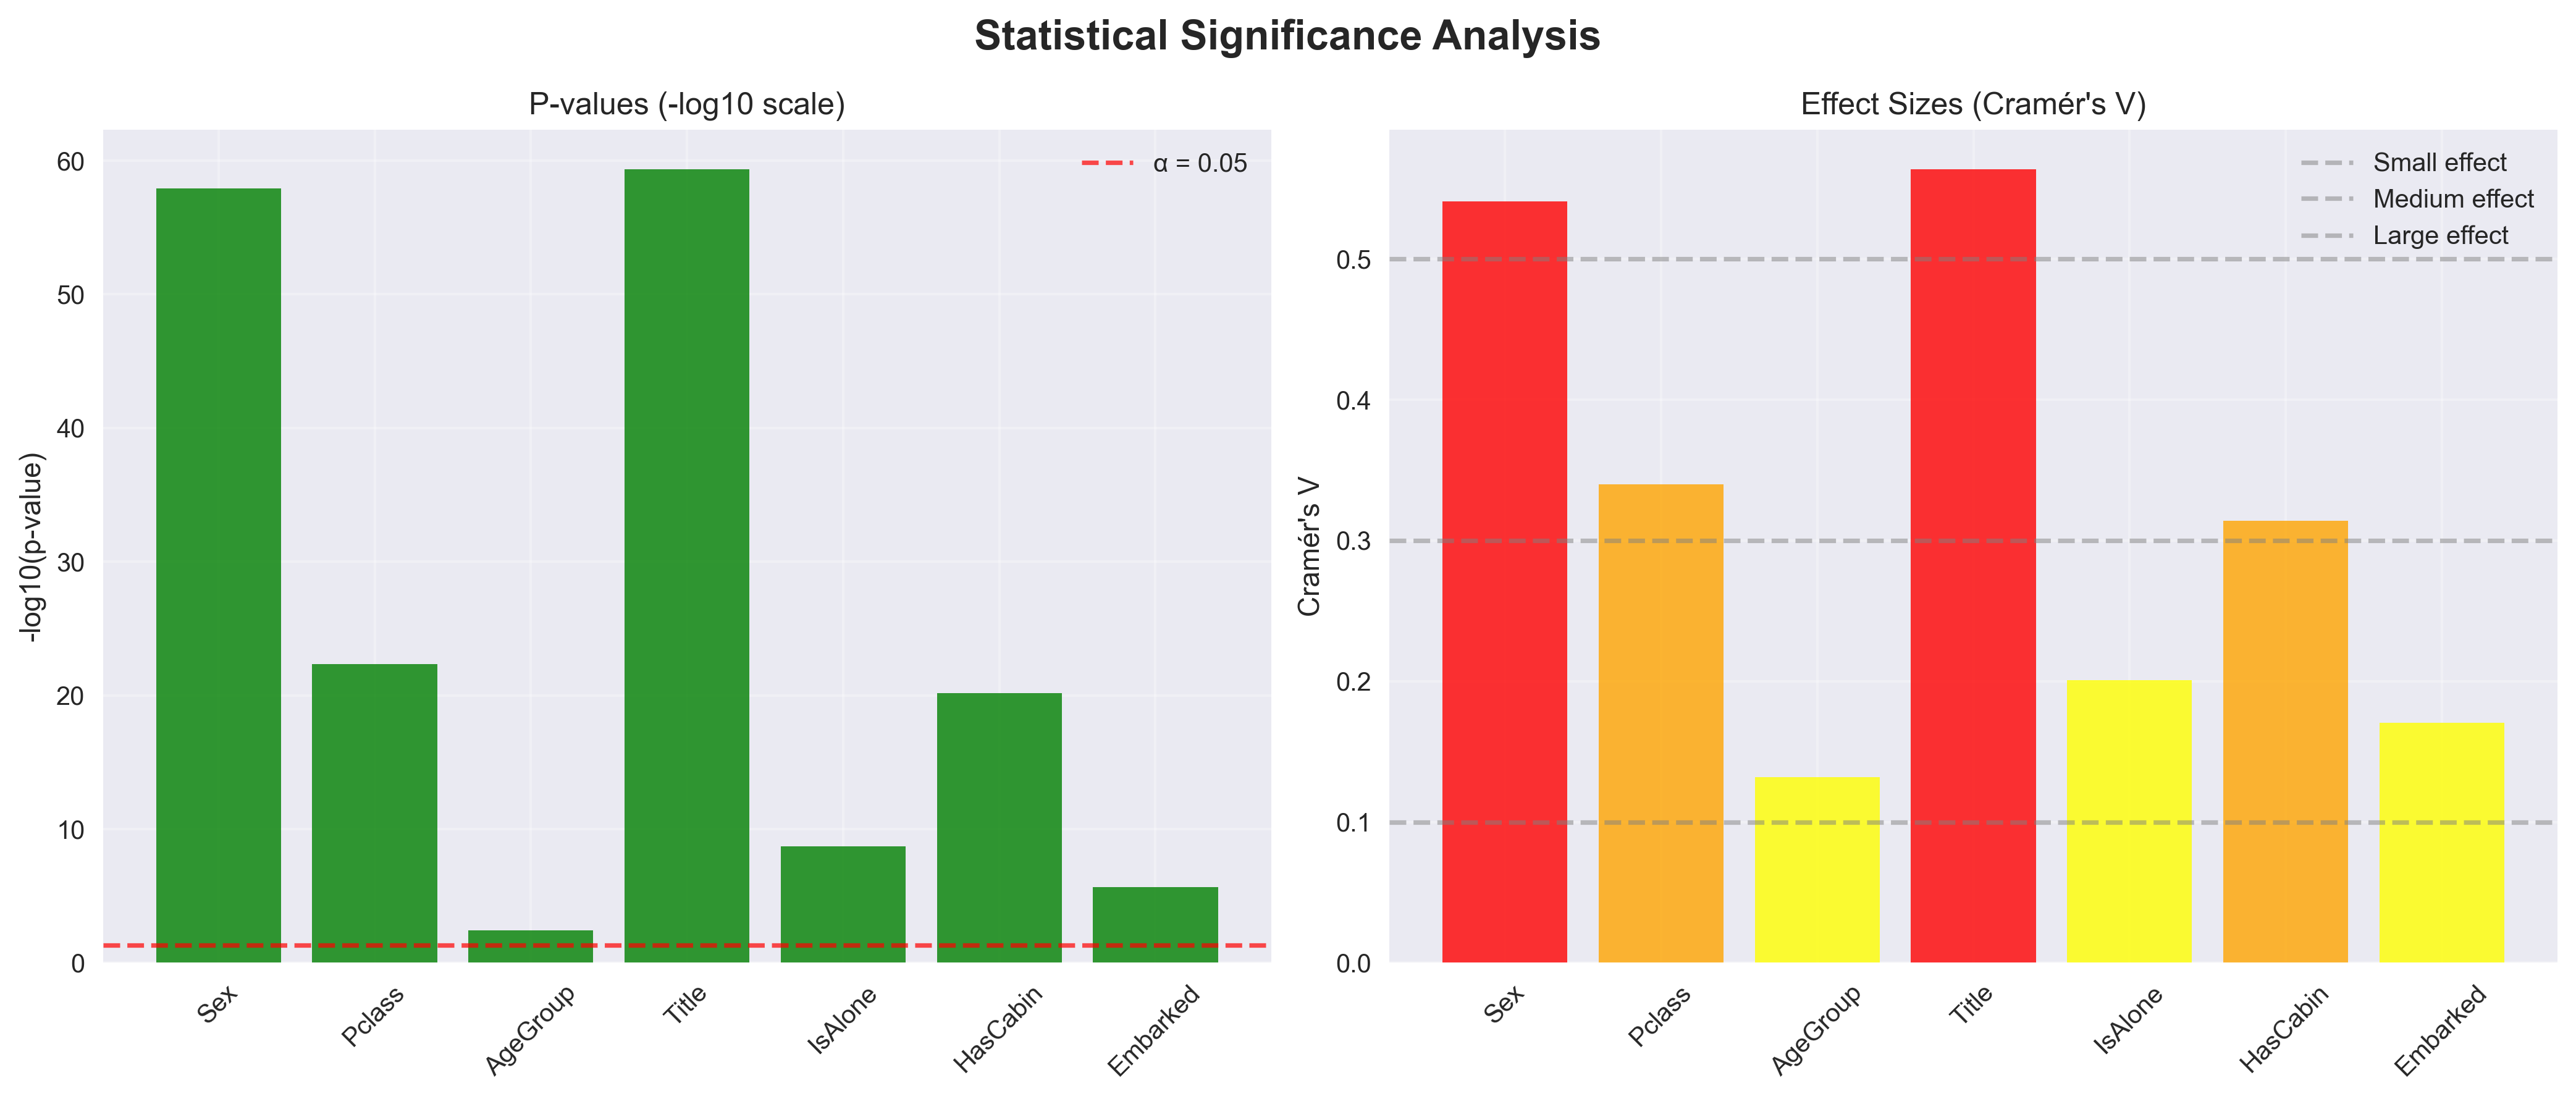

In [29]:
# 6. Statistical Significance Summary
from scipy.stats import chi2_contingency
import numpy as np

# Calculate chi-square statistics for visualization
categorical_features = ['Sex', 'Pclass', 'AgeGroup', 'Title', 'IsAlone', 'HasCabin', 'Embarked']
chi2_results = []
p_values = []
effect_sizes = []

for feature in categorical_features:
    contingency_table = pd.crosstab(df_clean[feature], df_clean['Survived'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Calculate Cramér's V (effect size)
    n = contingency_table.sum().sum()
    cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
    
    chi2_results.append(chi2)
    p_values.append(p_value)
    effect_sizes.append(cramers_v)

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Statistical Significance Analysis', fontsize=16, fontweight='bold')

# P-values comparison
colors = ['red' if p > 0.05 else 'green' for p in p_values]
axes[0].bar(categorical_features, [-np.log10(p) for p in p_values], color=colors, alpha=0.8)
axes[0].axhline(-np.log10(0.05), color='red', linestyle='--', alpha=0.7, label='α = 0.05')
axes[0].set_title('P-values (-log10 scale)')
axes[0].set_ylabel('-log10(p-value)')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Effect sizes (Cramér's V)
effect_colors = ['lightgreen' if v < 0.1 else 'yellow' if v < 0.3 else 'orange' if v < 0.5 else 'red' 
                for v in effect_sizes]
axes[1].bar(categorical_features, effect_sizes, color=effect_colors, alpha=0.8)
axes[1].set_title('Effect Sizes (Cramér\'s V)')
axes[1].set_ylabel('Cramér\'s V')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3)

# Add effect size interpretation
axes[1].axhline(0.1, color='gray', linestyle='--', alpha=0.5, label='Small effect')
axes[1].axhline(0.3, color='gray', linestyle='--', alpha=0.5, label='Medium effect')
axes[1].axhline(0.5, color='gray', linestyle='--', alpha=0.5, label='Large effect')
axes[1].legend()

plt.tight_layout()
plt.savefig('../reports/figures/06_statistical_significance_summary.png', dpi=300, bbox_inches='tight')
print("✅ Saved: 06_statistical_significance_summary.png")
plt.show()

### 📊 Chart 7: Statistical Proof

Show the results of our statistical tests - which factors REALLY made a difference in survival (not just by chance).

In [30]:
# Summary of generated figures
print("\n" + "="*60)
print("VISUALIZATION GENERATION COMPLETE")
print("="*60)
print("\nGenerated figures saved to '../reports/figures/':")
print("✅ 01_overview_survival_stats.png")
print("✅ 02_missing_values_analysis.png") 
print("✅ 03_demographics_breakdown.png")
print("✅ 04_comprehensive_survival_analysis.png")
print("✅ 05_family_composition_analysis.png")
print("✅ 06_statistical_significance_summary.png")

print(f"\nTotal figures generated: 6")
print("All figures saved at 300 DPI for publication quality")
print("Ready for use in reports, presentations, and portfolio!")


VISUALIZATION GENERATION COMPLETE

Generated figures saved to '../reports/figures/':
✅ 01_overview_survival_stats.png
✅ 02_missing_values_analysis.png
✅ 03_demographics_breakdown.png
✅ 04_comprehensive_survival_analysis.png
✅ 05_family_composition_analysis.png
✅ 06_statistical_significance_summary.png

Total figures generated: 6
All figures saved at 300 DPI for publication quality
Ready for use in reports, presentations, and portfolio!


### 💾 Save Our Charts

Save all our beautiful charts as high-quality image files so we can use them in presentations or reports.